In [1]:
import cv2
import numpy as np
import imutils
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('../src')

from algos import card_utils,detect,img_utils,preprocessing

In [3]:
def contour_to_img(shape,ctrs,thickness=1,colors=[]):
    if colors:
        img = np.full(shape, 255.).astype(np.uint8)
        for _i,_n in enumerate(ctrs):
            cv2.drawContours(img, ctrs, _i, colors[_i], thickness=thickness)
        return img
    else:
        img = np.full(shape, 0).astype(np.uint8)
        cv2.drawContours(img, ctrs, -1, (255,0,0), thickness=thickness)
        return img

In [ ]:
# too off center image_path = '../data/gpk-38b.webp'
# image_path = '../data/gpk-8a-psa.webp' # PSA
image_path = "../data/gpk-20b.webp"
image_path = "../data/gpk-37a.png"
image_path = "../data/gpk-16a.webp"  # grabs background
image_path = "../data/gpk-10b.webp"  # white back
image_path = "../data/gpk-12a.webp"  # sharp corners
image_path = "../data/gpk-40b.webp"  # black back
# image_path = "../data/gpk-14b.webp"  # sharp corners
# image_path = '../data/gpk-9b.webp' #big top banner
# image_path = "../data/gpk-1b.webp"  # white back poor contour
# image_path = "../data/gpk-35a.webp"  # white back med
# image_path = "../data/gpk-22b.webp"  # thatch back poor corners
# image_path = "../data/gpk-41a.webp"  # black back lighting
image_path = "../data/gpk-1b-2.webp"  # poor corners
# image_path = "../data/gpk-8b.webp"  # cant mask
# image_path = "../data/gpk-22a.webp" #checkerboard back
# image_path = "../data/gpk-29b.webp" #4 rounded corners
# image_path = "../data/gpk-8a.webp" #4 rounded corners
# image_path = "../data/gpk-17a.webp" #white back
# image_path = "../data/gpk-15b.webp" #white back terrible
# image_path = "../data/gpk-29b-2.webp" # bad corners
# image_path = "../data/gpk-6b.webp" #hand in back
# image_path = "../data/gpk-26b.webp" #sharp corners, good results
# image_path = "../data/gpk-4b.webp" # sharp corners, good results
#image_path = "../data/gpk-87b.webp"
image_path = "../data/gpk-31b.webp"
#image_path = "../data/gpk-31b-back.webp"
#image_path = "../data/gpk-33b.webp"
#image_path = "../data/gpk-30b.webp"#sharp black back
image_path = "../data/gpk-5b.webp"#med corners red back
image_path = "../data/gpk-5b-back.webp"#med corners red back
image_path = "../data/gpk-34a.webp"#rough corners  in sleeve
image_path = "../data/gpk-24b.webp" #sharp corners on stand 
image_path = "../data/gpk-21a.webp" 
image_path = "../data/gpk-20a.webp" #round corners mis cut
#image_path = "../data/gpk-11b.webp" 
image_path = "../data/gpk-36a.webp"  #mint black back
image_path = "../data/gpk-36b.webp"  #card off center 
image_path = "../data/gpk-36b-psa.webp"  #card off center 
image_path = "../data/gpk-38b-2.webp"  #good cornders, black back
image_path = "../data/gpk-25a.webp"  #on stand
image_path = "../data/gpk-21a-2.webp"  #orange back
image_path = "../data/gpk-2b.webp"  #red back

orig, image, mask, warp, results = preprocessing.score_card(
    image_path=image_path, debug=False
)

corner_imgs = []
edge_imgs = []

for _n in range(4):
    corner_imgs.append(
        contour_to_img(
            results["corner-shape"][_n],
            [results["corner-ideal-contour"][_n], results["corner-contour"][_n]],
            thickness=1,
        )
    )
    edge_imgs.append(
        contour_to_img(
            results["edge-shape"][_n],
            [
                results["edge-contour"][_n],
                results["edge-straight-ideal-contour"][_n],
                results["edge-ideal-contour"][_n],
            ],
            thickness=2,
            colors=[
                (
                    255,
                    0,
                    0,
                ),
                (0, 255, 0),
                (0, 0, 255),
            ],
        )
    )

trying k  15
found border at  138 [255] [20]
border color 254, corner 8 lower thresh 253 upper thresh 255
winning cont area  1278495.0
found border at  31 [255] [20]
border color 254, corner 82 lower thresh 252 upper thresh 256
border color 254, corner 81 lower thresh 252 upper thresh 256
border color 254, corner 0 lower thresh 252 upper thresh 256
border color 254, corner 219 lower thresh 252 upper thresh 256
wapr shape (1548, 1166)
ideals [[[  13 1275]
  [ 862 1275]
  [ 862 1305]
  [  13 1305]]]
ideals [[[ 13  54]
  [862  54]
  [862  84]
  [ 13  84]]]
border color 254, corner 35 lower thresh 252 upper thresh 256
border color 254, corner 0 lower thresh 252 upper thresh 256
border color 254, corner 112 lower thresh 252 upper thresh 256
border color 254, corner 173 lower thresh 252 upper thresh 256
corner results TL TR BL BR {0: 0.9666666666666667, 1: 0.9933333333333333, 2: 0.96, 3: 0.8666666666666667}
straight edge results TBLR {0: 0.9516071428571429, 1: 0.9989399293286219, 2: 0.867579

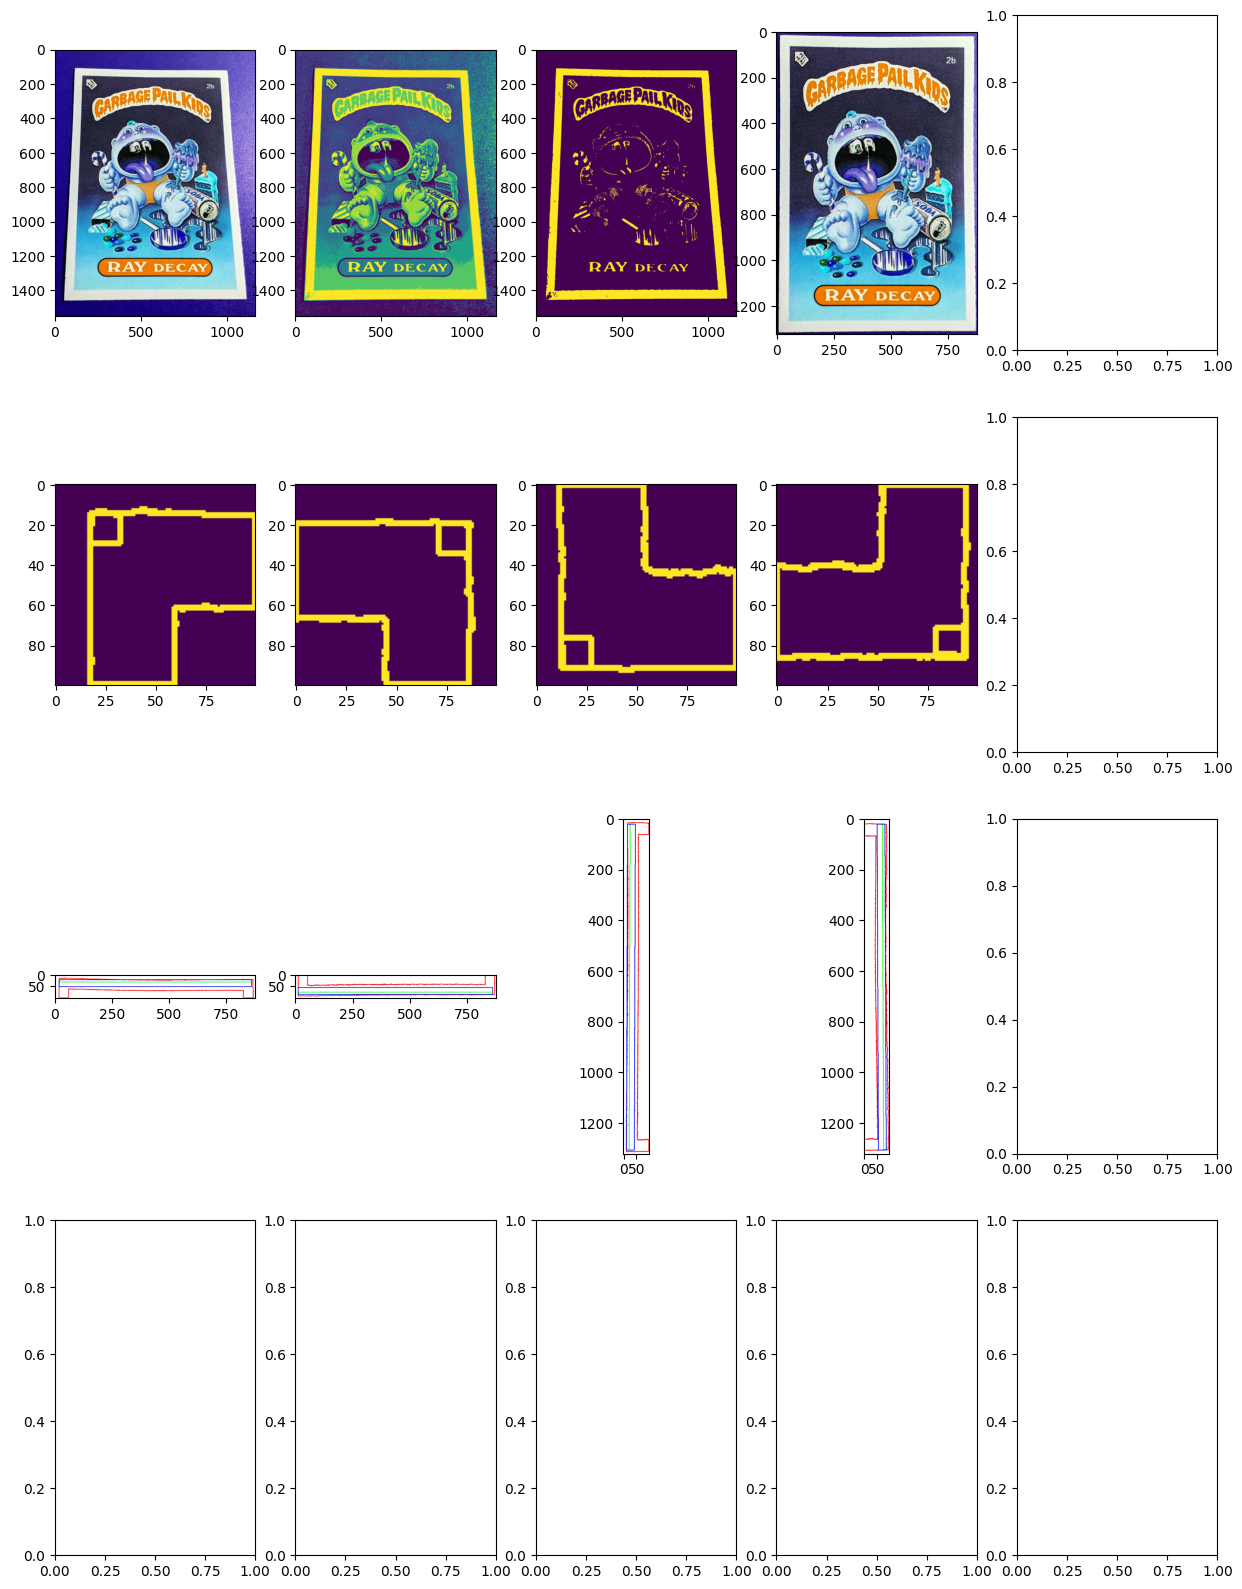

In [5]:
fig, ax = plt.subplots(nrows=4,ncols=5,figsize=(15,20))

ax[0,0].imshow(orig)
ax[0,1].imshow(image)
ax[0,2].imshow(mask)
ax[0,3].imshow(warp)

ax[1,0].imshow(corner_imgs[0])
ax[1,1].imshow(corner_imgs[1])
ax[1,2].imshow(corner_imgs[2])
ax[1,3].imshow(corner_imgs[3])

ax[2,0].imshow(edge_imgs[0])
ax[2,1].imshow(edge_imgs[1])
ax[2,2].imshow(edge_imgs[2])
ax[2,3].imshow(edge_imgs[3])

